# **Data Collection**

## Objectives

* Import necessary packages
* Set the working directory
* Fetch data from Kaggle and prepare it for further processing
* Clean the data
* Split the data into training, validation, and test sets

## Inputs

* JSON file used for authenticating and accessing Kaggle datasets.
* Once the [Potato Plant Diseases Dataset (V1)](https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data) is downloaded from Kaggle, it will be organized as follows:
```
└───input/
    ├───PlantVillage/
    │   └───PlantVillage/
    │       ├───Potato___Early_blight/
    │       │   ├───001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
    │       │   ├───002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
    │       │   └───...
    │       ├───Potato___Late_blight/
    │       │   ├───0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
    │       │   ├───00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG
    │       │   └───...    
    │       └───Potato___healthy/
    │           ├───00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
    │           ├───03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG
    │           └───...
    └───PotatoPlants/
        ├───Potato___Early_blight/
        │   ├───001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
        │   ├───002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
        │   └───...
        ├───Potato___Late_blight/
        │   ├───0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
        │   ├───00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG
        │   └───...    
        └───Potato___healthy/
            ├───00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
            ├───03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG
            └───...
```

## Outputs

* Once the dataset is downloaded from Kaggle, it will have this structure:
```
└───inputs/ 
    └───potato_disease_dataset/ 
        ├───test/
        │   ├───healthy
        │   ├───early_blight
        │   └───late_blight                   
        ├───train/
        │   ├───healthy
        │   ├───early_blight
        │   └───late_blight          
        └───validation/
            ├───healthy
            ├───early_blight
            └───late_blight               
```

---

## Import Packages

In [1]:
%pip install -r /workspace/ci-ms5-spudscan/requirements.txt

Note: you may need to restart the kernel to use updated packages.


---

## Import necessary packages for this notebook

In [2]:
import os
import shutil
import random
import zipfile

---

## Change working directory

As the notebooks are within a subfolder, you will need to change the working directory when running the notebook in the editor.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with `os.getcwd()`

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ci-ms5-spudscan/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* `os.path.dirname()` gets the parent directory
* `os.chir()` defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/ci-ms5-spudscan'

---

## Install Kaggle and download dataset

Install the kaggle package

In [6]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


With Kaggle now installed, follow these steps to import the dataset:

1. Run the cell below to change the Kaggle configuration directory to the current working directory and set permissions for the Kaggle authentication JSON.
    * _Note: To execute this, you need to upload your own kaggle.json file to the workspace for authentication. This cell sets the KAGGLE_CONFIG_DIR to the project's directory and assigns 'read' permission on kaggle.json to everyone. This ensures the Kaggle API request functions correctly. Also, ensure that kaggle.json is added to your .gitignore file to keep it secure and prevent it from being committed to your repository._

In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

2. Now, we define the path for the Kaggle [Potato Plant Diseases Dataset (V1)](https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data), create a directory for it, and then use a Kaggle command to download the dataset into this directory.

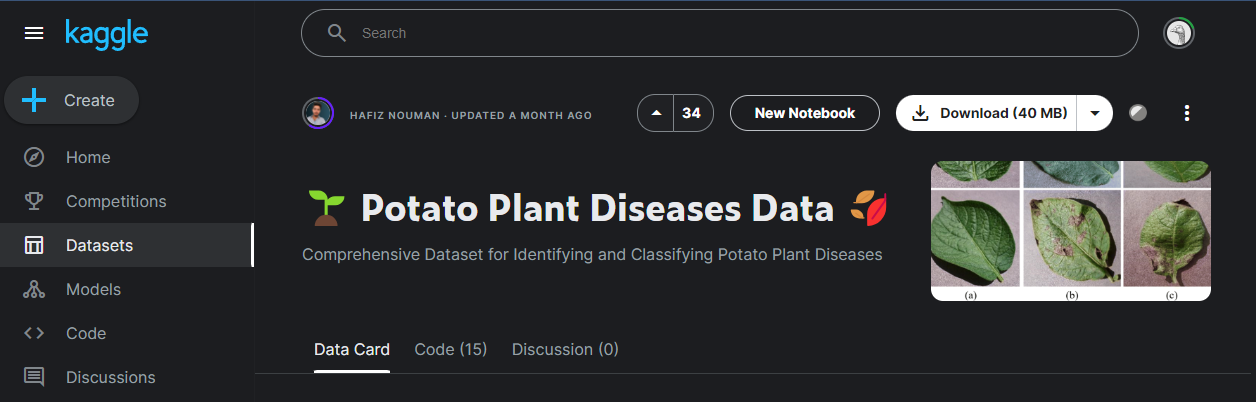

In [8]:
KaggleDatasetPath = "hafiznouman786/potato-plant-diseases-data"
DestinationFolder = "inputs/potato_disease_dataset"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data
License(s): CC0-1.0
 96%|████████████████████████████████████▌ | 73.0M/75.7M [00:02<00:00, 47.5MB/s]
100%|██████████████████████████████████████| 75.7M/75.7M [00:02<00:00, 35.4MB/s]


3. Unzip the downloaded file, and delete the zip file.

In [9]:
with zipfile.ZipFile(DestinationFolder + '/potato-plant-diseases-data.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/potato-plant-diseases-data.zip')

4. Clean up data structure

In [10]:
# Define the source and destination directories
source_plant_village = 'inputs/potato_disease_dataset/PlantVillage/PlantVillage'
source_potato_plants = 'inputs/potato_disease_dataset/PotatoPlants'
destination = 'inputs/potato_disease_dataset'

# List of subdirectories to be moved
subdirectories = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

# Move directories from PlantVillage to the destination
for subdir in subdirectories:
    src_path = os.path.join(source_plant_village, subdir)
    dest_path = os.path.join(destination, subdir)
    shutil.move(src_path, dest_path)

In [11]:
# Remove the PlantVillage directory
shutil.rmtree('inputs/potato_disease_dataset/PlantVillage')

In [12]:
# Remove the PotatoPlants directory
shutil.rmtree(source_potato_plants)

---

## Data Preparation

### Data Cleaning

Follow these steps to clean the dataset:

1. Check and remove all non-image files.

In [13]:
def remove_non_image_files(base_dir):
    # Define the image extensions
    image_extensions = ('.png', '.jpg', '.jpeg')
    
    # Define the subdirectories
    subdirectories = [
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight'
    ]
    
    # Iterate over each subdirectory
    for subdir in subdirectories:
        # Construct the full path to the subdirectory
        dir_path = os.path.join(base_dir, subdir)
        
        # Check if the directory exists
        if not os.path.exists(dir_path):
            print(f"Directory {dir_path} does not exist.")
            continue
        
        image_files = []
        non_image_files = []

        # Iterate over each file in the subdirectory
        for filename in os.listdir(dir_path):
            # Construct the full path to the file
            file_path = os.path.join(dir_path, filename)
            
            # Check if the file has a valid image extension
            if filename.lower().endswith(image_extensions):
                image_files.append(file_path)
            else:
                non_image_files.append(file_path)

        # Print the summary
        print(f"Folder: {dir_path} - has image files: {len(image_files)}")
        print(f"Folder: {dir_path} - has non-image files: {len(non_image_files)}")

        # Remove non-image files
        if non_image_files:
            for file_path in non_image_files:
                os.remove(file_path)
                print(f"Folder: {dir_path} - Removed file: {file_path}")
        else:
            print(f"Folder: {dir_path} - No non-image files to remove")

In [14]:
base_directory = 'inputs/potato_disease_dataset'
remove_non_image_files(base_directory)

Folder: inputs/potato_disease_dataset/Potato___Early_blight - has image files: 1000
Folder: inputs/potato_disease_dataset/Potato___Early_blight - has non-image files: 0
Folder: inputs/potato_disease_dataset/Potato___Early_blight - No non-image files to remove
Folder: inputs/potato_disease_dataset/Potato___healthy - has image files: 152
Folder: inputs/potato_disease_dataset/Potato___healthy - has non-image files: 0
Folder: inputs/potato_disease_dataset/Potato___healthy - No non-image files to remove
Folder: inputs/potato_disease_dataset/Potato___Late_blight - has image files: 1000
Folder: inputs/potato_disease_dataset/Potato___Late_blight - has non-image files: 0
Folder: inputs/potato_disease_dataset/Potato___Late_blight - No non-image files to remove


### Split train, validation and test set

In [15]:
def split_dataset(base_dir, train_ratio=0.7, validation_ratio=0.15, test_ratio=0.15):
    assert train_ratio + validation_ratio + test_ratio == 1.0, "Ratios must sum up to 1.0"
    
    # Define the subdirectories
    subdirectories = [
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight'
    ]
    
    # Create train, validation, and test directories at the base directory level
    for split in ['train', 'validation', 'test']:
        split_dir = os.path.join(base_dir, split)
        os.makedirs(split_dir, exist_ok=True)
        for subdir in subdirectories:
            os.makedirs(os.path.join(split_dir, subdir), exist_ok=True)
    
    # Split the dataset
    for subdir in subdirectories:
        dir_path = os.path.join(base_dir, subdir)
        
        # Get all files in the subdirectory
        files = [f for f in os.listdir(dir_path) 
                 if os.path.isfile(os.path.join(dir_path, f))]
        random.shuffle(files)
        
        train_split = int(len(files) * train_ratio)
        validation_split = int(len(files) * (train_ratio + validation_ratio))
        
        train_files = files[:train_split]
        validation_files = files[train_split:validation_split]
        test_files = files[validation_split:]
        
        # Move files to train directory
        for filename in train_files:
            src = os.path.join(dir_path, filename)
            dst = os.path.join(base_dir, 'train', subdir, filename)
            shutil.move(src, dst)
        
        # Move files to validation directory
        for filename in validation_files:
            src = os.path.join(dir_path, filename)
            dst = os.path.join(base_dir, 'validation', subdir, filename)
            shutil.move(src, dst)
        
        # Move files to test directory
        for filename in test_files:
            src = os.path.join(dir_path, filename)
            dst = os.path.join(base_dir, 'test', subdir, filename)
            shutil.move(src, dst)
        
        print(f"Folder: {dir_path} - Total files: {len(files)}, Train: {len(train_files)}, Validation: {len(validation_files)}, Test: {len(test_files)}")

        # Remove the original subdirectory if it's empty
        if not os.listdir(dir_path):
            os.rmdir(dir_path)
            print(f"Removed empty folder: {dir_path}")

In [16]:
base_directory = 'inputs/potato_disease_dataset'
split_dataset(base_directory)

Folder: inputs/potato_disease_dataset/Potato___Early_blight - Total files: 1000, Train: 700, Validation: 150, Test: 150
Removed empty folder: inputs/potato_disease_dataset/Potato___Early_blight
Folder: inputs/potato_disease_dataset/Potato___healthy - Total files: 152, Train: 106, Validation: 23, Test: 23
Removed empty folder: inputs/potato_disease_dataset/Potato___healthy
Folder: inputs/potato_disease_dataset/Potato___Late_blight - Total files: 1000, Train: 700, Validation: 150, Test: 150
Removed empty folder: inputs/potato_disease_dataset/Potato___Late_blight


---

This concludes the Data Collection notebook.

---